In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import sys



In [2]:
# Load datasets
healthy_df = pd.read_csv(r"C:\Users\unais\Desktop\SSEE_Final_Project\Currents HEALTHY.csv")
fault_20_df = pd.read_csv(r"C:\Users\unais\Desktop\SSEE_Final_Project\CurrentsERROR_1.csv")
fault_60_df = pd.read_csv(r"C:\Users\unais\Desktop\SSEE_Final_Project\Currents ERROR_3.csv")

datasets = {"0%": healthy_df, "20%": fault_20_df, "60%": fault_60_df}



In [3]:
# Function to extract RMS, Peak, Mean from Phase A, B, C currents
def extract_features(data, label):
    features = {}
    for phase in ["Current(PhaseA) [A]", "Current(PhaseB) [A]", "Current(PhaseC) [A]"]:
        features[f"{phase}_RMS"] = np.sqrt(np.mean(np.square(data[phase])))
        features[f"{phase}_Peak"] = np.max(np.abs(data[phase]))
        features[f"{phase}_Mean"] = np.mean(data[phase])
    features["Fault Level"] = float(label.strip('%'))  # Convert to numeric fault percentage
    return features



In [4]:
# Extract features for all datasets
feature_data = [extract_features(data, label) for label, data in datasets.items()]
feature_df = pd.DataFrame(feature_data)



In [5]:
# Prepare dataset for training
X = feature_df.drop(columns=["Fault Level"])
y = feature_df["Fault Level"]



In [6]:
# Train a Random Forest Regressor for continuous fault prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)



RandomForestRegressor(random_state=42)

In [7]:
# Function to predict fault percentage based on input current values
def predict_fault():
    phase_a_rms = float(input("Enter Phase A RMS current (A): "))
    phase_a_peak = float(input("Enter Phase A Peak current (A): "))
    phase_a_mean = float(input("Enter Phase A Mean current (A): "))
    
    phase_b_rms = float(input("Enter Phase B RMS current (A): "))
    phase_b_peak = float(input("Enter Phase B Peak current (A): "))
    phase_b_mean = float(input("Enter Phase B Mean current (A): "))
    
    phase_c_rms = float(input("Enter Phase C RMS current (A): "))
    phase_c_peak = float(input("Enter Phase C Peak current (A): "))
    phase_c_mean = float(input("Enter Phase C Mean current (A): "))
    
    input_data = np.array([
        phase_a_rms, phase_a_peak, phase_a_mean,
        phase_b_rms, phase_b_peak, phase_b_mean,
        phase_c_rms, phase_c_peak, phase_c_mean
    ]).reshape(1, -1)
    
    prediction = model.predict(input_data)
    predicted_fault = round(prediction[0], 2)
    print("Predicted Fault Percentage:", predicted_fault, "%")
    
    # Fault Severity Comment with Colors
    if predicted_fault < 20:
        comment = "\033[92m\033[1;4mMINOR FAULT DETECTED. MONITOR THE SYSTEM.\033[0m"  # Green (Bold, Underlined)
    elif 20 <= predicted_fault < 40:
        comment = "\033[93m\033[1;4mFAULT SEVERITY INCREASING. IMMEDIATE MAINTENANCE REQUIRED.\033[0m"  # Orange (Bold, Underlined)
    else:
        comment = "\033[91m\033[1;4mSEVERE FAULT DETECTED. MOTOR REPLACEMENT RECOMMENDED.\033[0m"  # Red (Bold, Underlined)
    print("Comment:", comment)
    
    # Plot System Condition with Legend
    plt.figure(figsize=(8,5))
    fault_levels = [0, 20, 60]
    colors = ['blue', 'orange', 'red', 'green']
    labels = ['Healthy (0%)', '20% Fault', '60% Fault', 'Predicted Fault']
    plt.bar(fault_levels + [predicted_fault], [0.2, 0.4, 0.6, predicted_fault / 100], color=colors, label=labels)
    plt.xlabel("Fault Percentage")
    plt.ylabel("System Condition")
    plt.title("Fault Condition in System")
    plt.legend()
    plt.show()



In [8]:
# Model Accuracy Evaluation
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error: 10.00
R² Score: 0.82


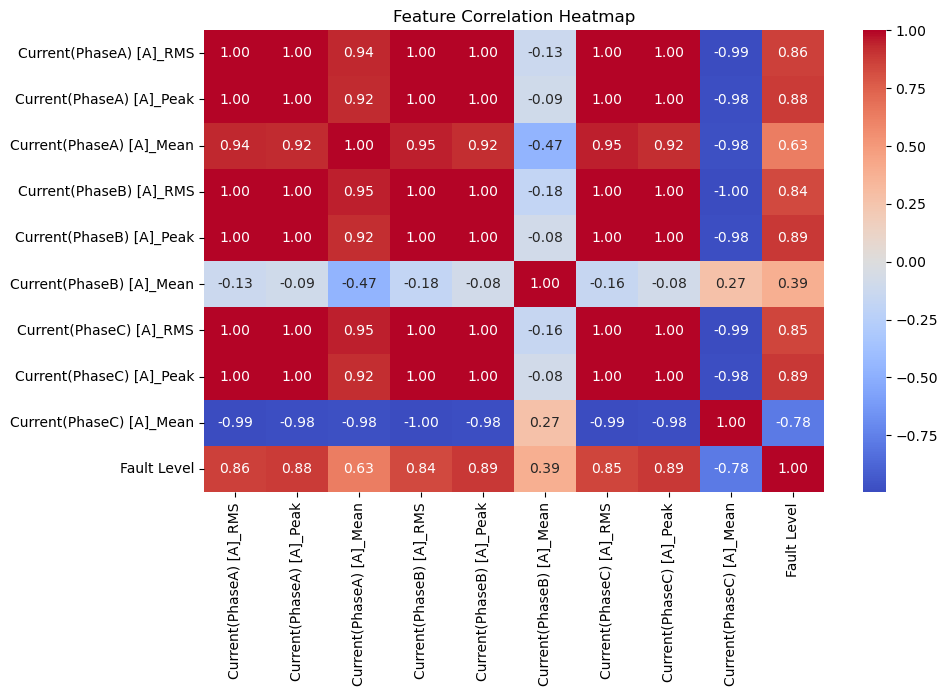

In [9]:
# Feature Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(feature_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



Enter Phase A RMS current (A):  4
Enter Phase A Peak current (A):  5
Enter Phase A Mean current (A):  6
Enter Phase B RMS current (A):  4
Enter Phase B Peak current (A):  5
Enter Phase B Mean current (A):  6
Enter Phase C RMS current (A):  4
Enter Phase C Peak current (A):  5
Enter Phase C Mean current (A):  6


C:\Users\unais\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Fault Percentage: 41.2 %
Comment: SEVERE FAULT DETECTED. MOTOR REPLACEMENT RECOMMENDED.


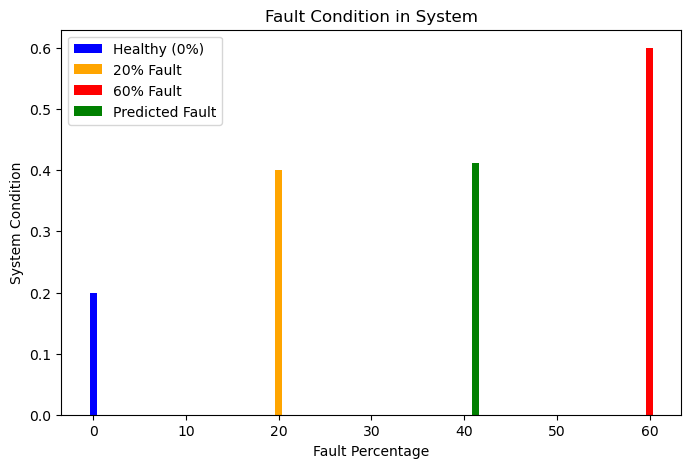

In [14]:
# Run the prediction function
if __name__ == "__main__":
    predict_fault()
